In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical     # converts numeric class labels into one-hot encoded format for training classification models

In [ ]:
df = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
df.isnull().sum()

,0
label,0
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


In [ ]:
#preprocess
X_train = df.drop("label", axis=1).values
y_train = df["label"].values
X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])

In [ ]:
perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_percp = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8050 - loss: 434.5487 - val_accuracy: 0.8888 - val_loss: 225.3382
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8689 - loss: 260.7804 - val_accuracy: 0.8947 - val_loss: 197.2467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8717 - loss: 253.9433 - val_accuracy: 0.8955 - val_loss: 209.4268
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8731 - loss: 242.0621 - val_accuracy: 0.9033 - val_loss: 198.4931
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8783 - loss: 236.4423 - val_accuracy: 0.8808 - val_loss: 260.7662


In [ ]:
acc_percp = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [ ]:
acc_percp

0.8808000087738037

In [ ]:
#ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_ann = ann.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7812 - loss: 4.4741 - val_accuracy: 0.8934 - val_loss: 0.4290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9093 - loss: 0.3565 - val_accuracy: 0.9363 - val_loss: 0.2530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9364 - loss: 0.2433 - val_accuracy: 0.9455 - val_loss: 0.2146
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9511 - loss: 0.1744 - val_accuracy: 0.9514 - val_loss: 0.1946
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9616 - loss: 0.1344 - val_accuracy: 0.9597 - val_loss: 0.1500


In [ ]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]

In [ ]:
acc_ann

0.9596999883651733

In [ ]:
X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [ ]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.7336 - loss: 1.6183 - val_accuracy: 0.9796 - val_loss: 0.0698
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9559 - loss: 0.1572 - val_accuracy: 0.9841 - val_loss: 0.0524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9680 - loss: 0.1123 - val_accuracy: 0.9837 - val_loss: 0.0584
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9722 - loss: 0.0963 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9780 - loss: 0.0773 - val_accuracy: 0.9876 - val_loss: 0.0479


In [ ]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]

In [ ]:
acc_cnn

0.9876000285148621

In [ ]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

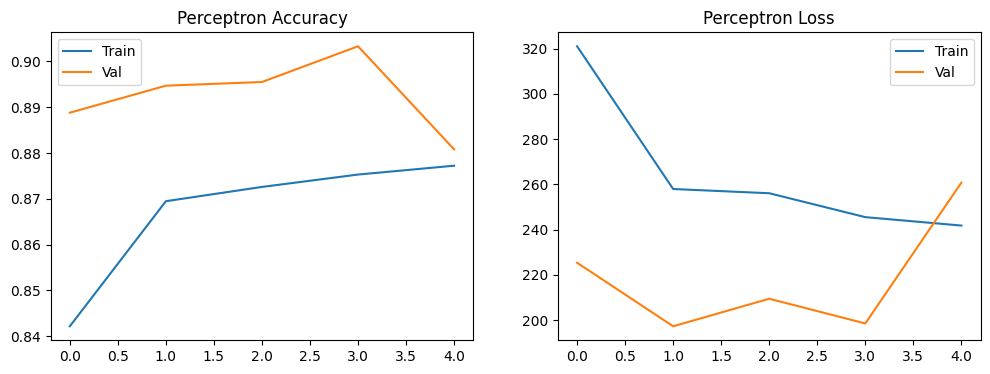

In [ ]:
plot_training(history_percp, "Perceptron")

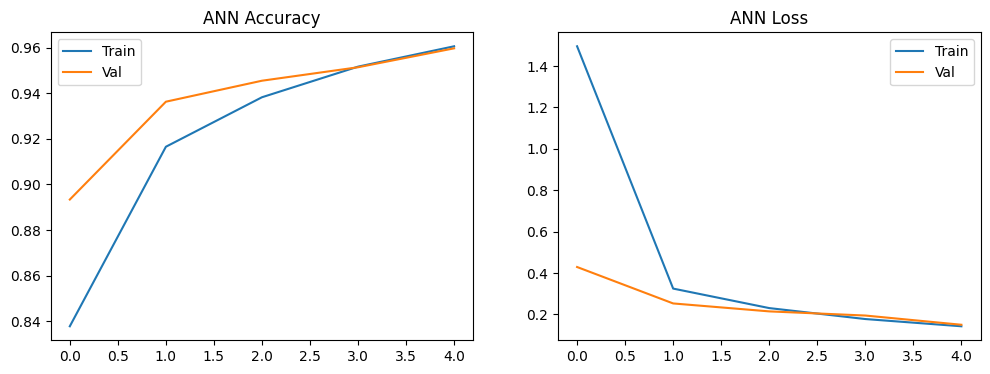

In [ ]:
plot_training(history_ann, "ANN")

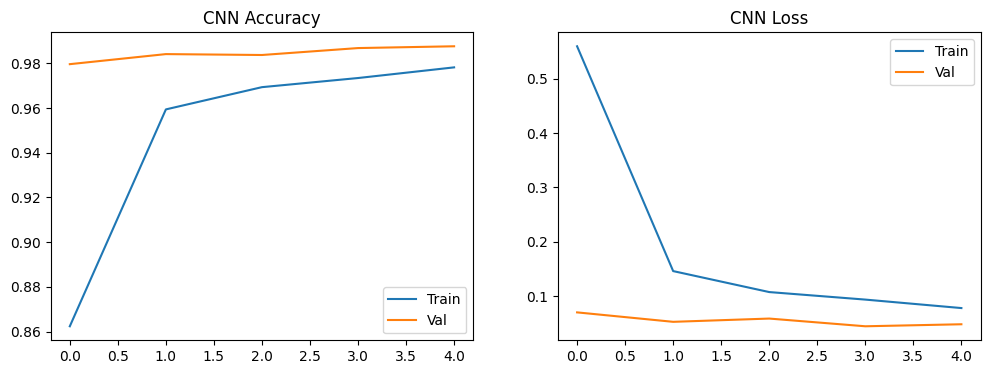

In [ ]:
plot_training(history_cnn, "CNN")

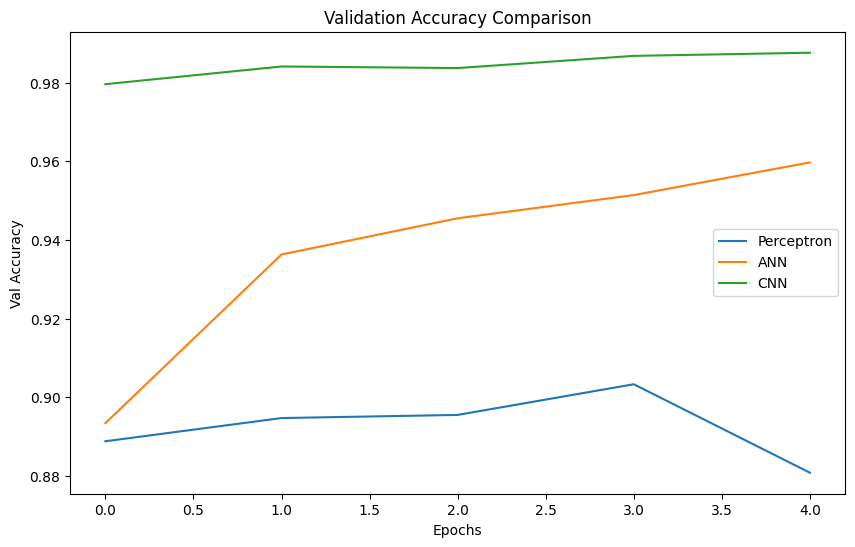

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

In [ ]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


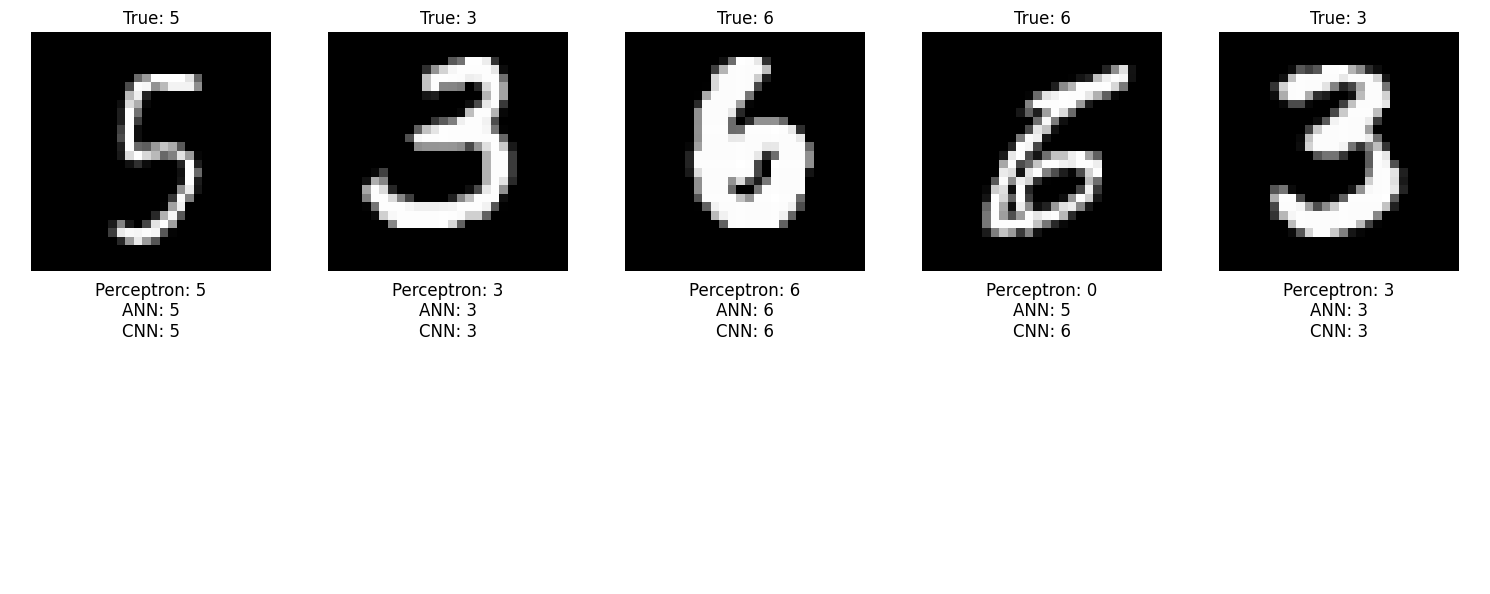

In [ ]:
show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


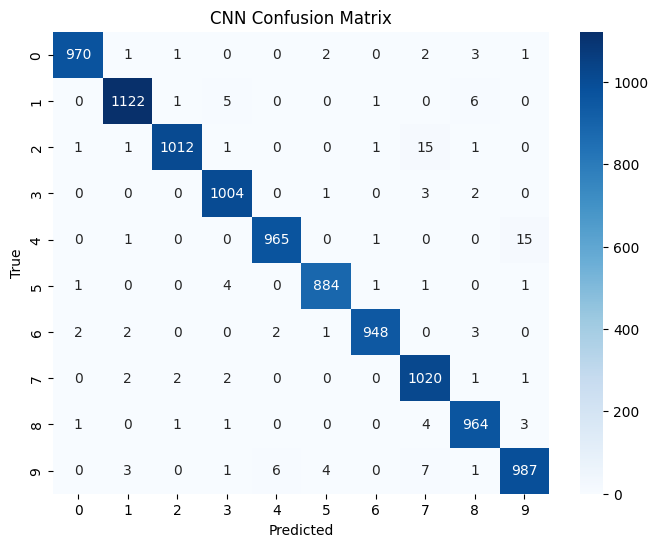

In [ ]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

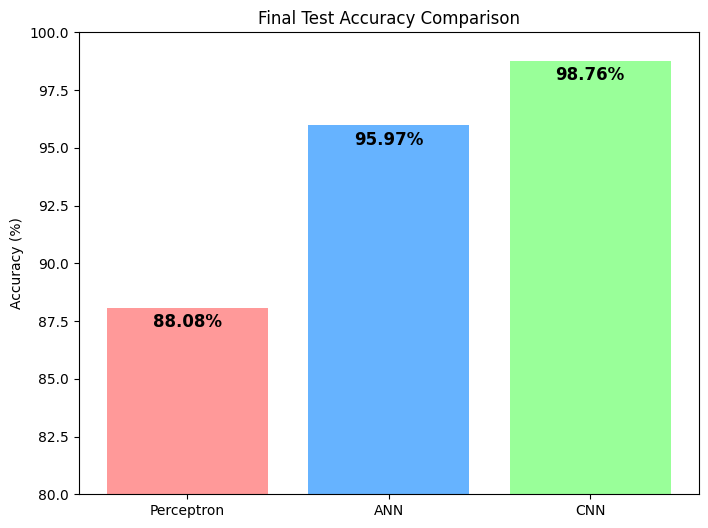

In [ ]:
final_accs = [acc_percp*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()